# Titanic - Machine Learning to Disaster
The Kaggle Titanic problem is a classic machine learning challenge focused on predicting the survival outcome of passengers aboard the Titanic. With a dataset encompassing various attributes such as age, gender, passenger class, fare, and cabin location, participants are tasked with crafting a predictive model. The aim is to accurately determine whether a passenger survived the disaster based on these features. The competition furnishes a training dataset for model development and a separate test dataset for performance evaluation. By leveraging machine learning techniques, participants endeavor to create robust models capable of discerning survival outcomes amidst the tragedy's historical context.

## 1. Import Packages

In [59]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import string 
import re 

# Filter warnings
warnings.filterwarnings('ignore')

# Data preprocessing imports
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import KNNImputer, SimpleImputer 
from feature_engine.wrappers import SklearnTransformerWrapper  
from sklearn.preprocessing import StandardScaler  
from sklearn.impute import IterativeImputer  
from sklearn.ensemble import ExtraTreesRegressor

# Model evaluation and selection imports
from sklearn.metrics import classification_report, accuracy_score, precision_recall_curve, PrecisionRecallDisplay, roc_curve, RocCurveDisplay  # Evaluation metrics
from sklearn.model_selection import train_test_split, GridSearchCV  # Train-test split and grid search

# Machine learning models
from sklearn.linear_model import LogisticRegression  # Logistic regression
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.neighbors import KNeighborsClassifier  # K-Nearest Neighbors Classifier
from sklearn.tree import DecisionTreeClassifier  # Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier  # Ensemble methods
from sklearn.neural_network import MLPClassifier  # Multi-layer Perceptron Classifier

# Preprocessing imports
from sklearn.preprocessing import LabelEncoder, StandardScaler

## 2. Import Data

In [2]:
# Import data
df_train = pd.read_csv("../data/train.csv")
df_test = pd.read_csv("../data/test.csv")

## 3. Initial Data Exploration

In [3]:
# check df
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# check sample df 
df_train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
753,754,0,3,"Jonkoff, Mr. Lalio",male,23.0,0,0,349204,7.8958,NaN,S
404,405,0,3,"Oreskovic, Miss. Marija",female,20.0,0,0,315096,8.6625,NaN,S
205,206,0,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,G6,S
92,93,0,1,"Chaffee, Mr. Herbert Fuller",male,46.0,1,0,W.E.P. 5734,61.1750,E31,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0000,NaN,S


In [5]:
# check shape train df
df_train.shape

(891, 12)

In [6]:
# check shape test df
df_test.shape

(418, 11)

In [7]:
# describe train dataset
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# describe test dataset
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [9]:
# describe object type
df_train.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [10]:
# describe object type
df_test.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Kelly, Mr. James",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [11]:
def missing_value(df: pd.DataFrame):
    """
    Function to calculate and display missing values in a DataFrame.

    Parameters:
        train_df (pd.DataFrame): Input DataFrame containing the data.

    Returns:
        pd.DataFrame: DataFrame containing information about missing values.
            Columns include:
                - 'columns_name': Name of columns in the DataFrame.
                - 'num_missing': Number of missing values in each column.
                - 'perc_missing': Percentage of missing values in each column, with '%' symbol.
    
    Example:
        missing_value(train_df)
    """
    missing_df = df.isnull().sum()
    total_record = df.shape[0]
    perc_missing = round((missing_df / total_record) * 100, 2)
    missing_df = pd.DataFrame(data={'Name of the column': missing_df.index,
                                           'Missing values': missing_df.values,
                                           'Percentage': perc_missing.values})

    # Add percentage symbol to the 'perc_missing' column
    missing_df['Percentage'] = missing_df['Percentage'].astype(str) + ' %'

    return missing_df.sort_values(by='Percentage', ascending=False)

In [12]:
missing_value(df_train)

,Name of the column,Missing values,Percentage
10,Cabin,687,77.1 %
5,Age,177,19.87 %
11,Embarked,2,0.22 %
0,PassengerId,0,0.0 %
1,Survived,0,0.0 %
2,Pclass,0,0.0 %
3,Name,0,0.0 %
4,Sex,0,0.0 %
6,SibSp,0,0.0 %
7,Parch,0,0.0 %


In [13]:
missing_value(df_test)

,Name of the column,Missing values,Percentage
9,Cabin,327,78.23 %
4,Age,86,20.57 %
8,Fare,1,0.24 %
0,PassengerId,0,0.0 %
1,Pclass,0,0.0 %
2,Name,0,0.0 %
3,Sex,0,0.0 %
5,SibSp,0,0.0 %
6,Parch,0,0.0 %
7,Ticket,0,0.0 %


**Conclusions**
- The dataset of training contains $891$ lines and $12$ columns while the test $418$ lines
- The average ``Age`` is $29$ (Train) and $30$ (Test)
- The average price of the ticket (``Fare``) is $32$ (*Train*) and $35$ (*Test*)
- The missing values in  *Train* are in the ``Cabin``, ``Age`` and ``Embarked`` columns 
- The missing values in *Test* are in the ``Cabin``, ``Age`` and ``Fare`` columns 

## 4. Missing values

### 4.1 Processing the data

In [14]:
# Function to remove punctuation from a string
def remove_punctuation(text):
    """
    Remove punctuation characters from the input text.

    Parameters:
    text (str): The input text from which punctuation will be removed.

    Returns:
    str: The input text with all punctuation characters removed.
    """
     
    return text.translate(str.maketrans('', '', string.punctuation))

In [15]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [16]:
# Define the deck level dictionary
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
# Define the title to remove
titles_to_remove = ['Dr', 'Master', 'Miss', 'Mr', 'Mrs', 'Rev']

# Create a list of datasets
data = [df_train, df_test]

for dataset in data:
    # Fill missing Cabin values with 'U0'
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")

    # Extract the first sequence of letters which represents the deck and map it to a number
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)

    # Fill missing deck values with 0
    dataset['Deck'] = dataset['Deck'].fillna(0)

    # Convert deck to an integer type
    dataset['Deck'] = dataset['Deck'].astype(int)

    # Drop the Cabin column
    dataset.drop(['Cabin'], axis=1, inplace=True)
    
    # Remove punctuation from names
    dataset['Name'] = dataset['Name'].apply(lambda x: remove_punctuation(x))
    
    # Remove punctuation from names and words of one letter
    dataset['Name'] = dataset['Name'].apply(lambda x: ' '.join(word for word in remove_punctuation(x).split() if len(word) > 1))
    
    # Extract titles from names and remove them
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    dataset['Name'] = dataset['Name'].apply(lambda x: ' '.join(word for word in x.split() if word not in titles_to_remove))
    dataset.drop(['Title'], axis=1, inplace=True)

### 4.2 Missing values in ``Age``

In [17]:
# create a temporary df
df_tmp=df_train.copy()

In [18]:
def scaler_data(df, scaler, columns):
    """
    Scale the specified columns in the DataFrame using the provided scaler.

    Parameters:
    df (DataFrame): The input DataFrame to be scaled.
    scaler: The scaler object used for transformation.
    columns (list): List of column names to be scaled.

    Returns:
    DataFrame: The scaled DataFrame with specified columns transformed.
    scaler: The fitted scaler object used for transformation.
    """
    df_scaler = df.copy()
    
    if columns:
        df_scaler[columns] = scaler.fit_transform(df_scaler[columns])
    else:
        columns = [col for col in df_scaler]
        df_scaler[columns] = scaler.fit_transform(df_scaler[columns])
    
    return df_scaler, scaler

In [19]:
# Create a StandardScaler object
scaler = StandardScaler()

# Extracting the names of numerical columns excluding 'passenger_id' and 'survived'
num_name = list(df_train.select_dtypes('number').drop(['PassengerId', 'Survived'], axis=1).columns)

# Creating a DataFrame containing only numerical columns excluding 'passenger_id' and 'survived'
number_df = df_train.select_dtypes('number').drop(['PassengerId', 'Survived'], axis=1)
# Scale the numerical columns in the 'number_df' DataFrame
df_scaled, scaler = scaler_data(number_df, scaler=scaler, columns=num_name)

In [20]:
# Create an IterativeImputer with ExtraTreesRegressor as estimator
miss_forest = IterativeImputer(estimator=ExtraTreesRegressor(), initial_strategy='median', max_iter=200)

# Impute missing values in the 'number_df' DataFrame using IterativeImputer
tree_imputed = miss_forest.fit_transform(number_df)
tree_imputed_df = pd.DataFrame(data=tree_imputed, columns=miss_forest.get_feature_names_out())

# Impute missing values in the 'test_df' DataFrame using the trained IterativeImputer
test_imputed = miss_forest.transform(df_test[num_name])
test_imputed_df = pd.DataFrame(data=test_imputed, columns=miss_forest.get_feature_names_out())

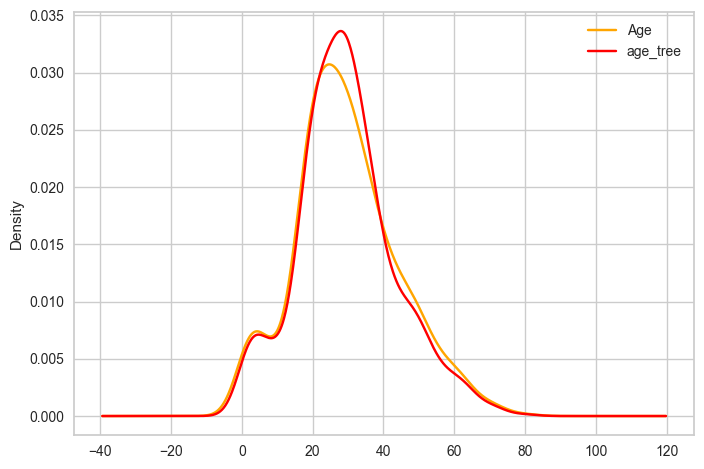

In [21]:
# Plot KDE for 'age' column in different scenarios
df_tmp.Age.plot.kde(color='orange', label='Age')
tree_imputed_df.Age.plot.kde(color='red', label='age_tree')

# Display legend and show the plot
plt.legend()
plt.show()

In [22]:
# Update the 'age' column in train_df with imputed values from tree_imputed_df
df_train['Age'] = tree_imputed_df['Age']

# Update the 'age' column in test_df with imputed values from test_imputed_df
df_test['Age'] = test_imputed_df['Age']

### 4.3 Missing Values in ``Fare`` and ``Embarked``

In [23]:
# Update the 'fare' column in test_df with imputed values from test_imputed_df
df_test['Fare'] = test_imputed_df['Fare']

In [24]:
#fill  the missing value with the mode value
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace=True)

## 5. EDA

### 5.1 Survival rate based on Gender

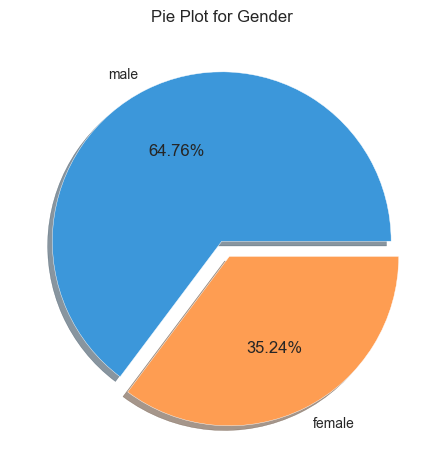

In [25]:
# Pie plot for 'sex'
label = ['male', 'female']
size = df_train['Sex'].value_counts()
explode = [0.0, 0.1]
colors = ['#3c97da', '#fe9d52']
plt.pie(size, labels=label, explode=explode, autopct='%0.2f%%', shadow=True, colors=colors)
plt.title('Pie Plot for Gender')
plt.show()

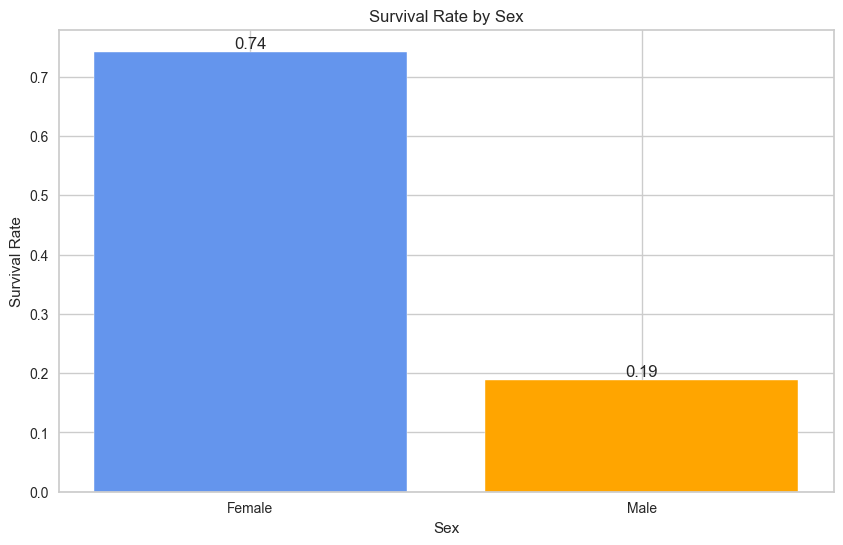

In [26]:
# Calculate the survival count by sex
sex_survived = pd.crosstab(df_train['Survived'], df_train['Sex'])

# Calculate survival rate by sex
total_female = sex_survived.loc[1, 'female'] + sex_survived.loc[0, 'female']
total_male = sex_survived.loc[1, 'male'] + sex_survived.loc[0, 'male']

survival_rate_female = sex_survived.loc[1, 'female'] / total_female
survival_rate_male = sex_survived.loc[1, 'male'] / total_male

# Plot the bar plot using Matplotlib
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = ['Female', 'Male']
survival_rates = [survival_rate_female, survival_rate_male]
bars = plt.bar(index, survival_rates, color=['#6495ED', 'orange'])

plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Sex')

# Adding text labels
for bar, rate in zip(bars, survival_rates):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{rate:.2f}',
             ha='center', va='bottom')

plt.show()

The majority of the passenger in the Titanic were **males**.
We can also observe that most **females** survived from the disaster while only a few **males** survived. 

### 5.2 Class Survival Distribution

Text(0.5, 1.0, 'Pie Plot for Passenger Class')

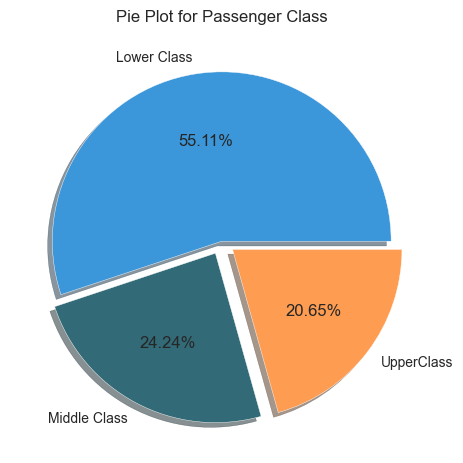

In [27]:
label = ['Lower Class', 'Middle Class', 'UpperClass']
colors = ['#3c97da', '#326b77', '#fe9d52']
size = df_train['Pclass'].value_counts()
explode = [0.0, 0.08, 0.08]
plt.pie(size, labels=label, explode=explode, autopct='%0.2f%%', shadow=True, colors=colors)
plt.title('Pie Plot for Passenger Class')

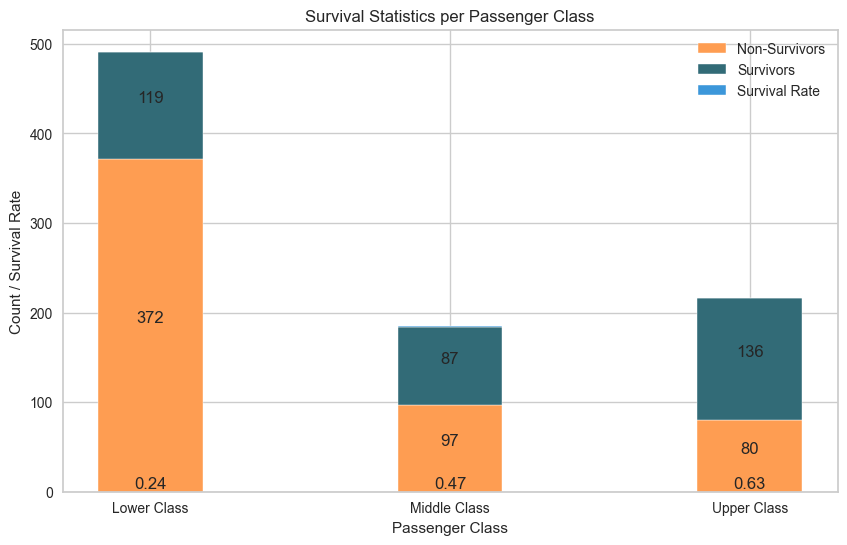

In [28]:
# Calculate survival count by passenger class
class_survived = pd.crosstab(df_train['Survived'], df_train['Pclass'])

# Calculate survival rate per class
total_lower_class = class_survived.loc[1, 3] + class_survived.loc[0, 3]
total_middle_class = class_survived.loc[1, 2] + class_survived.loc[0, 2]
total_upper_class = class_survived.loc[1, 1] + class_survived.loc[0, 1]

survival_rate_lower_class = class_survived.loc[1, 3] / total_lower_class
survival_rate_middle_class = class_survived.loc[1, 2] / total_middle_class
survival_rate_upper_class = class_survived.loc[1, 1] / total_upper_class

# Plot the bar plot using Matplotlib
plt.figure(figsize=(10, 6))
labels = ['Lower Class', 'Middle Class', 'Upper Class']
survival_rates = [survival_rate_lower_class, survival_rate_middle_class, survival_rate_upper_class]
survivors = [class_survived.loc[1, 3], class_survived.loc[1, 2], class_survived.loc[1, 1]]
non_survivors = [class_survived.loc[0, 3], class_survived.loc[0, 2], class_survived.loc[0, 1]]
colors = ['#3c97da', '#326b77', '#fe9d52']
bar_width = 0.35
index = range(len(labels))

plt.bar(index, non_survivors, bar_width, label='Non-Survivors', color=colors[2])
plt.bar(index, survivors, bar_width, bottom=non_survivors, label='Survivors', color=colors[1])
plt.bar(index, survival_rates, bar_width, bottom=[survivors[i] + non_survivors[i] for i in range(len(survivors))], label='Survival Rate', color=colors[0])

plt.xlabel('Passenger Class')
plt.ylabel('Count / Survival Rate')
plt.title('Survival Statistics per Passenger Class')
plt.xticks(index, labels)
plt.legend()

# Adding text labels
for i, rate in enumerate(survival_rates):
    plt.text(i, rate / 2, f'{rate:.2f}', ha='center', va='bottom')

for i, (survivor, non_survivor) in enumerate(zip(survivors, non_survivors)):
    plt.text(i, non_survivor / 2, str(non_survivor), ha='center', va='bottom')
    plt.text(i, (survivor + non_survivor) - (survivor / 2), str(survivor), ha='center', va='bottom')

plt.show()

We can observe that the ``Lower Class`` Cabins had the lowest survival rate ($0.24$), while the ``Upper Class`` Cabins had the higher survival rate ($0.63$).

### 5.3 Age Distribution

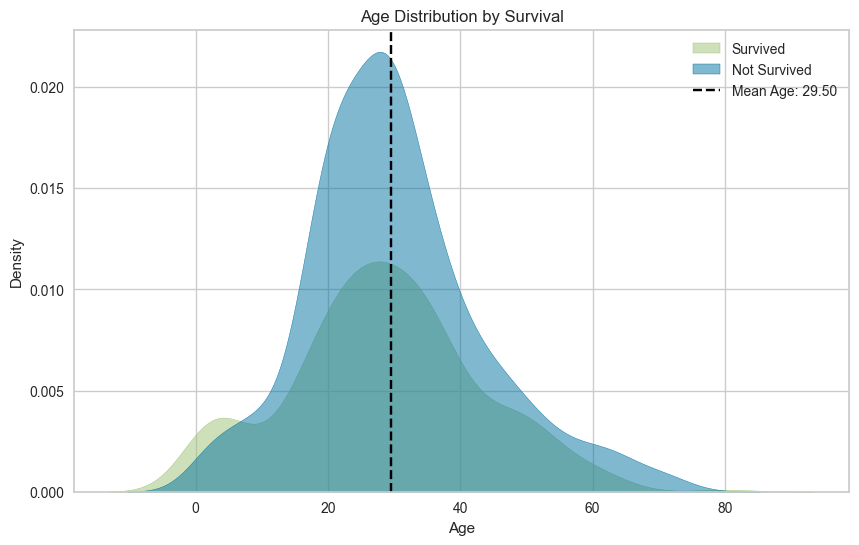

In [29]:
# Calculate the mean age
mean_age = df_train['Age'].mean()

# Create the distribution plot with hue
fig, ax = plt.subplots(figsize=(10, 6))
sns.kdeplot(data=df_train, x='Age', hue='Survived', shade=True, alpha=0.5, ax=ax)

# Add a line for the mean age
ax.axvline(mean_age, color='black', linestyle='--', label=f'Mean Age: {mean_age:.2f}')

# Customize the plot
ax.set_title('Age Distribution by Survival')
ax.set_xlabel('Age')
ax.set_ylabel('Density')
ax.legend(['Survived', 'Not Survived', f'Mean Age: {mean_age:.2f}'])

# Display the plot
plt.show()

## 6. Preparing Data

In [30]:
def transform(df):
    """
    Perform data transformation on the given DataFrame by binning `Fare` and `Age` columns,
    and label encoding the `Fare_Bin`, `Age_Bin`, and `Sex` columns.

    Parameters:
    -----------
    df : pandas DataFrame
        Input DataFrame containing columns to be transformed.

    Returns:
    --------
    df : pandas DataFrame
        DataFrame with data transformation applied (binning and label encoding).
    """
    
    df['Fare_Bin'] = pd.qcut(df['Fare'], 5)
    df['Age_Bin'] = pd.qcut(df['Age'], 4)
        
    # Label Encoding 
    df['Fare_Bin'] = LabelEncoder().fit_transform(df['Fare_Bin'])
    df['Age_Bin'] = LabelEncoder().fit_transform(df['Age_Bin'])
    df['Sex'] = LabelEncoder().fit_transform(df['Sex'])

    return df

In [31]:
def feat_eng(df):
    """
    Perform feature engineering on the given DataFrame by dropping unnecessary columns.
    Parameters:
    -----------
    df : pandas DataFrame
        Input DataFrame containing features to be engineered.

    Returns:
    --------
    df : pandas DataFrame
        DataFrame with feature engineering applied (unnecessary columns dropped).
    """
    
    df.drop(['Name', 'Age', 'Fare', 'SibSp', 'Parch', 'Ticket', 'Embarked'], axis=1, inplace=True)
    return df

In [32]:
def ml_models(algo_name, algo, param, X_train, y_train, X_test, y_test):
    """
    Apply Grid Search to tune hyperparameters for a given algorithm, fit the model,
    and evaluate its performance.

    Parameters:
    -----------
    algo_name : str
        Name of the algorithm for display purposes.
    algo : sklearn estimator
        Algorithm to be tuned and evaluated.
    param : dict
        Dictionary of hyperparameters for the algorithm.
    X_train : array-like
        Training input samples.
    y_train : array-like
        Target values for training.
    X_test : array-like
        Test input samples.
    y_test : array-like
        Target values for testing.

    Returns:
    --------
    best_model : sklearn estimator
        Best model selected by GridSearchCV.
    acc_score : float
        Accuracy score on the test set.
    acc_score_train : float
        Accuracy score on the training set.
    best_score : float
        Best cross-validated score obtained during grid search.
    """

    # Apply Grid Search
    model = GridSearchCV(algo, param_grid=param, cv=10, n_jobs=-1, verbose=1)
    
    # Fitting Model
    print(f'.:. Fitting {algo_name} .:.')
    fit_model = model.fit(X_train, y_train)
    print(fit_model)
    
    # Final Estimators
    best_estimator = model.best_estimator_
    print(f'\n.:. Final Estimators for {algo_name} .:.')
    print(best_estimator)
    
    # Prediction Result & Best Estimator
    y_pred_train = model.predict(X_train)
    y_pred = model.predict(X_test)
    best_model = model.best_estimator_
    
    # Acc & Best Score
    best_score = model.best_score_
    acc_score_train = accuracy_score(y_pred_train, y_train)
    acc_score = accuracy_score(y_pred, y_test)
    print(f'\n.:. Accuracy & Best Score for {algo_name} .:.')
    print('\t>> Accuracy:', '{:.2f}%'.format(acc_score*100))
    print('\t>> Best Score:', '{:.2f}%'.format(best_score*100))
    
    # Classification Report
    print('\n.:. Classification Report .:.')
    print(classification_report(y_test, y_pred))
    
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, best_model.predict_proba(X_test)[:, 1])
    plt.plot(fpr, tpr, color='green', lw=2, label=f'ROC curve for {algo_name}')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {algo_name}')
    plt.legend(loc='lower right')
    plt.show()
    
    return best_model, acc_score, acc_score_train, best_score

In [33]:
# applying functions
df_train_f = transform(df_train)
df_train_f = feat_eng(df_train_f)

In [34]:
# Split df_test_f into features (X_test_f) and target (y_test_f)
X_train = df_train_f.drop('Survived', axis=1)
y_train = df_train_f['Survived']

# Now split your training data into train and validation sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

## 7. Modelisation

### 7.1 Logistic Regression
Logistic regression is a **statistical method** used for **binary classification tasks**, where the outcome variable has **two possible outcomes**, typically represented as **0 and 1**. It's a type of **regression analysis** that models the **probability** of the outcome occurring as a function of one or more **predictor variables**. 

In logistic regression, the **output or dependent variable** is a **binary variable**, and the **predictor or independent variables** can be **continuous or categorical**. The logistic regression model applies the **logistic function** (also known as the **sigmoid function**) to transform the **linear combination** of predictor variables into a **probability score** between **0 and 1**. This probability score represents the **likelihood** of the outcome belonging to a **particular class**.

Logistic regression is widely used in various fields, including **healthcare**, **finance**, and **marketing**, for tasks such as **predicting customer churn**, **classifying spam emails**, and **diagnosing diseases** based on **medical test results**.



In [35]:
# Define model parameters
lr_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

.:. Fitting Logistic Regression .:.
Fitting 10 folds for each of 12 candidates, totalling 120 fits


/Users/zaccaria/Documents/GitHub/Altri progetti/Titanic/Titanic/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/zaccaria/Documents/GitHub/Altri progetti/Titanic/Titanic/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alterna

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             verbose=1)

.:. Final Estimators for Logistic Regression .:.
LogisticRegression(C=10)

.:. Accuracy & Best Score for Logistic Regression .:.
	>> Accuracy: 77.09%
	>> Best Score: 78.37%

.:. Classification Report .:.
              precision    recall  f1-score   support

           0       0.79      0.84      0.81       105
           1       0.75      0.68      0.71        74

    accuracy                           0.77       179
   macro avg       0.77      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179


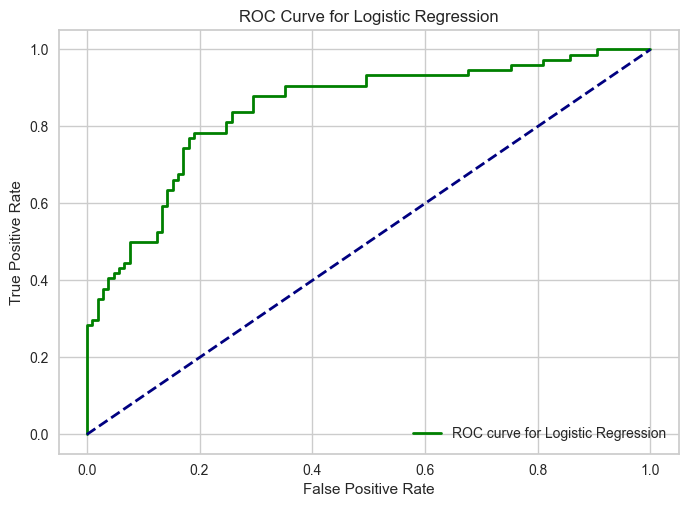

In [36]:
model_LR = ml_models('Logistic Regression', LogisticRegression(), lr_param_grid, X_train, y_train, X_test, y_test)

### 7.2 Support Vector Machine (SVM)
**Support Vector Machine (SVM)** is a powerful **supervised learning** algorithm used for **classification** and **regression** tasks. It's particularly effective for **binary classification** problems but can be extended to **multi-class classification** as well. 

The main objective of SVM is to find the **optimal hyperplane** that **best separates** the data points into different classes. This hyperplane is determined by maximizing the **margin**, which is the **distance** between the hyperplane and the nearest data points (support vectors). 

SVM can handle both **linear** and **non-linear** relationships between features and labels by using different **kernel functions**. These kernel functions allow SVM to map the input features into a **higher-dimensional space** where the data points become **linearly separable**, even if they were not in the original feature space.

One of the key advantages of SVM is its ability to handle **high-dimensional** data efficiently, making it suitable for tasks with **large feature sets**. Additionally, SVM is **robust to overfitting** and **generalizes well** to unseen data when properly tuned. It's commonly used in various domains, including **image classification**, **text classification**, **bioinformatics**, and **financial forecasting**.


In [51]:
svc_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

.:. Fitting Support Vector Machine .:.
Fitting 10 folds for each of 24 candidates, totalling 240 fits
GridSearchCV(cv=10, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=1)

.:. Final Estimators for Support Vector Machine .:.
SVC(C=0.1, kernel='linear', probability=True)

.:. Accuracy & Best Score for Support Vector Machine .:.
	>> Accuracy: 78.21%
	>> Best Score: 78.79%

.:. Classification Report .:.
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       105
           1       0.75      0.70      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179


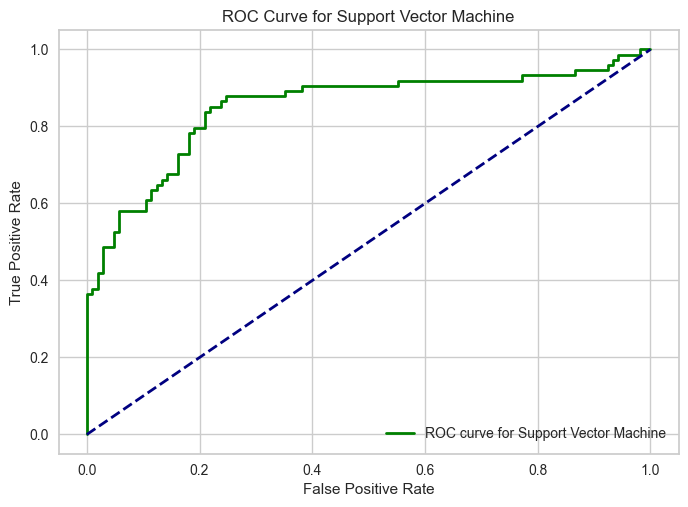

In [52]:
model_SVC = ml_models('Support Vector Machine', SVC(probability=True), svc_param_grid, X_train, y_train, X_test, y_test)

### 7.3 K-Nearest Neighbour (KNN)
**k-Nearest Neighbors (KNN)** is a simple and versatile **supervised learning** algorithm used for **classification** and **regression** tasks. It's a **non-parametric** and **instance-based** method, meaning it doesn't make strong assumptions about the underlying data distribution.

The key idea behind KNN is to predict the class of a data point by **averaging** the classes of its **k nearest neighbors**. The distance metric used to measure proximity between data points can vary, with **Euclidean distance** being the most common choice. 

KNN is highly **flexible** and can adapt to complex decision boundaries, making it suitable for **non-linear** classification problems. However, its performance heavily depends on the choice of **k** and the **distance metric**. A small value of k may lead to **overfitting**, while a large value of k may lead to **underfitting**.

KNN is computationally **inefficient** for large datasets since it requires **storing** and **searching** through the entire training data at inference time. Despite this drawback, KNN is widely used in various applications, including **recommendation systems**, **image recognition**, and **gene expression analysis**.


In [39]:
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}


.:. Fitting K-Nearest Neighbour .:.
Fitting 10 folds for each of 16 candidates, totalling 160 fits
GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 9], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             verbose=1)

.:. Final Estimators for K-Nearest Neighbour .:.
KNeighborsClassifier(n_neighbors=9, p=1, weights='distance')

.:. Accuracy & Best Score for K-Nearest Neighbour .:.
	>> Accuracy: 62.01%
	>> Best Score: 64.46%

.:. Classification Report .:.
              precision    recall  f1-score   support

           0       0.62      0.89      0.73       105
           1       0.60      0.24      0.35        74

    accuracy                           0.62       179
   macro avg       0.61      0.56      0.54       179
weighted avg       0.61      0.62      0.57       179


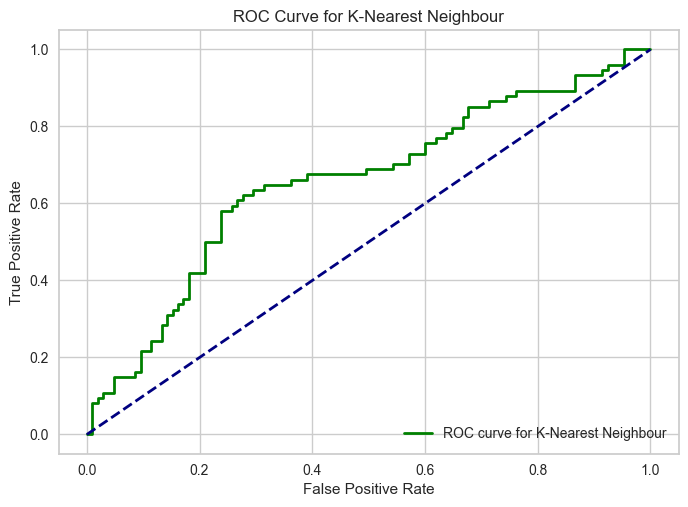

In [40]:
model_KNN = ml_models('K-Nearest Neighbour', KNeighborsClassifier(), knn_param_grid, X_train, y_train, X_test, y_test)

### 7.4 Decision Tree Classifier
The **Decision Tree Classifier** is a popular **supervised learning** algorithm used for **classification** tasks. It's a **non-parametric** and **tree-based** model that learns a **hierarchical structure** of decision rules from the training data.

At each node of the decision tree, the algorithm **splits** the data based on the **feature** that best **separates** the classes. This process continues recursively, creating a **tree-like structure** where each internal node represents a decision based on a feature, and each leaf node represents a class label.

Decision trees are **interpretable** and **easy to visualize**, making them useful for understanding the **decision-making process** of the model. However, they're prone to **overfitting**, especially when the tree is allowed to grow too deep or when the dataset has noisy or irrelevant features.

To mitigate overfitting, **pruning techniques** such as **limiting tree depth** or **setting a minimum number of samples per leaf** can be applied. Additionally, ensemble methods like **Random Forests** and **Gradient Boosting** combine multiple decision trees to improve predictive performance and generalization.

Decision trees are widely used in various domains, including **finance**, **healthcare**, and **marketing**, for tasks such as **customer segmentation**, **fraud detection**, and **medical diagnosis**.


In [41]:
dt_param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


.:. Fitting Decision Tree .:.
Fitting 10 folds for each of 36 candidates, totalling 360 fits
GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             verbose=1)

.:. Final Estimators for Decision Tree .:.
DecisionTreeClassifier(max_depth=5, min_samples_leaf=4, min_samples_split=10)

.:. Accuracy & Best Score for Decision Tree .:.
	>> Accuracy: 79.89%
	>> Best Score: 78.80%

.:. Classification Report .:.
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179


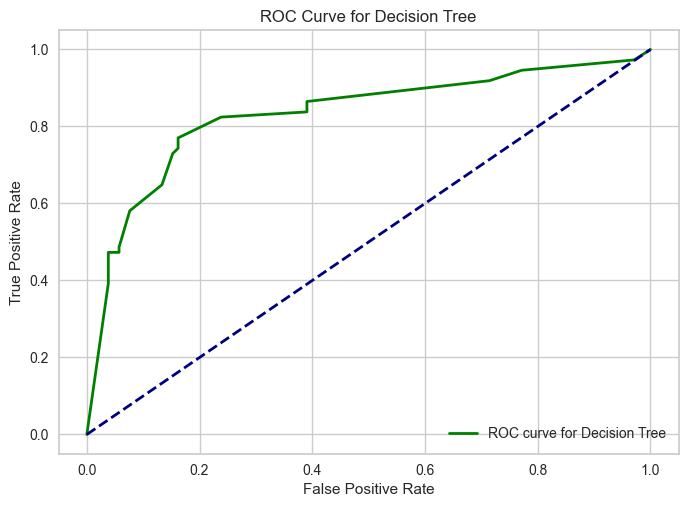

In [42]:
model_DT = ml_models('Decision Tree', DecisionTreeClassifier(), dt_param_grid, X_train, y_train, X_test, y_test)

### 7.5 Random Forest Classifier 
The **Random Forest Classifier** is a powerful **ensemble learning** algorithm used for **classification** tasks. It's an extension of the **decision tree** algorithm that builds multiple decision trees and merges their predictions to improve accuracy and reduce overfitting.

Random Forest works by **training** a large number of **decision trees** on random **subsets** of the training data and random **subsets** of the features. During prediction, each tree in the forest **votes** for the most popular class, and the class with the most votes becomes the final prediction.

One of the key advantages of Random Forest is its ability to handle **high-dimensional** data and **large datasets** effectively. It's also **robust** to **overfitting** and **generalizes well** to unseen data. Additionally, Random Forest provides **feature importance** scores, which can help identify the most informative features in the dataset.

However, Random Forest is computationally **expensive** and may require **tuning** of hyperparameters such as the number of trees and the maximum depth of each tree. Despite this drawback, Random Forest is widely used in various applications, including **finance**, **bioinformatics**, and **image classification**.


In [43]:
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

.:. Fitting Random Forest .:.
Fitting 10 folds for each of 108 candidates, totalling 1080 fits
GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=1)

.:. Final Estimators for Random Forest .:.
RandomForestClassifier(max_depth=5, min_samples_split=5, n_estimators=50)

.:. Accuracy & Best Score for Random Forest .:.
	>> Accuracy: 78.21%
	>> Best Score: 81.04%

.:. Classification Report .:.
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       105
           1       0.82      0.61      0.70        74

    accuracy                           0.78       179
   macro avg       0.79      0.76      0.76       179
weighted avg       0.79      0.78      0.78       179


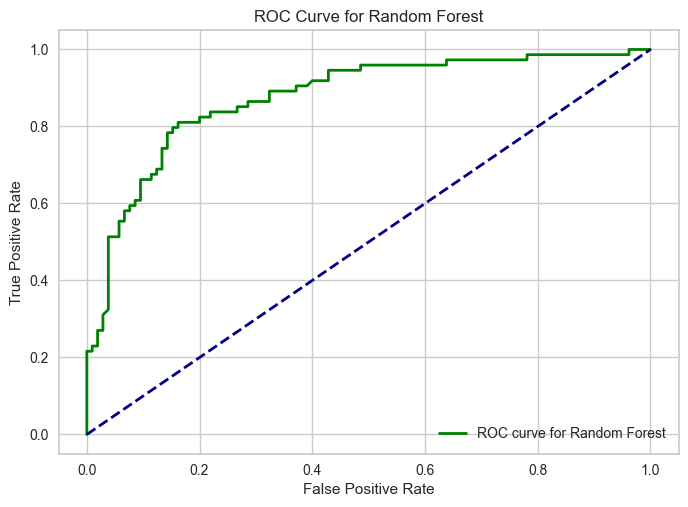

In [44]:
model_RF = ml_models('Random Forest', RandomForestClassifier(), rf_param_grid, X_train, y_train, X_test, y_test)

### 7.6 Gradient Boosting
**Gradient Boosting** is a powerful **ensemble learning** technique used for **classification** and **regression** tasks. It builds a predictive model by **combining** the predictions of multiple **weak learners** in a sequential manner.

At each iteration, Gradient Boosting **fits** a new weak learner to the **residual errors** of the previous learners, gradually **improving** the overall prediction. This iterative process focuses on **minimizing** the **loss function**, such as mean squared error for regression or cross-entropy loss for classification.

One of the key advantages of Gradient Boosting is its ability to **capture complex relationships** in the data and produce **highly accurate** predictions. It's also **robust** to **overfitting** and can handle **missing data** effectively.

However, Gradient Boosting can be **computationally expensive** and may require **careful tuning** of hyperparameters such as the learning rate, tree depth, and number of iterations. Despite these challenges, Gradient Boosting is widely used in various domains, including **finance**, **healthcare**, and **online advertising**, for tasks such as **fraud detection**, **patient outcome prediction**, and **click-through rate prediction**.


In [45]:
gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

.:. Fitting Gradient Boosting .:.
Fitting 10 folds for each of 243 candidates, totalling 2430 fits
GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=1)

.:. Final Estimators for Gradient Boosting .:.
GradientBoostingClassifier(min_samples_leaf=2, min_samples_split=5)

.:. Accuracy & Best Score for Gradient Boosting .:.
	>> Accuracy: 79.89%
	>> Best Score: 80.76%

.:. Classification Report .:.
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80 

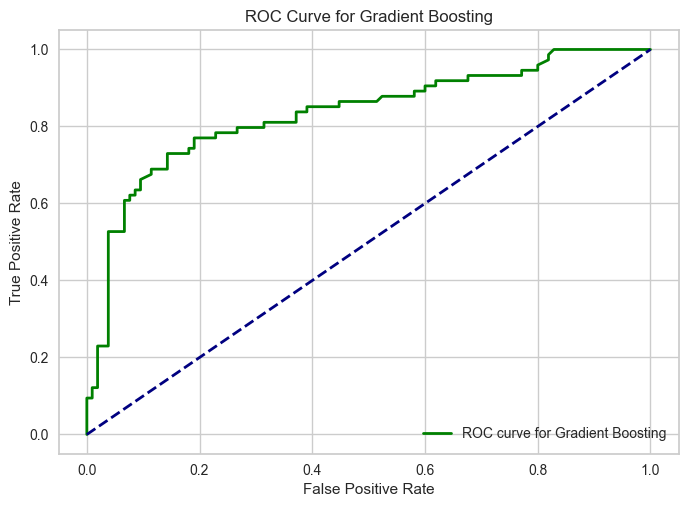

In [46]:
model_GB = ml_models('Gradient Boosting', GradientBoostingClassifier(), gb_param_grid, X_train, y_train, X_test, y_test)

### 7.7 Extra Tree Classifier
The **Extra Trees Classifier** is an ensemble learning method that belongs to the family of **tree-based algorithms**, similar to Random Forest. It builds multiple decision trees and combines their predictions to make a final classification.

What sets Extra Trees apart from Random Forest is that it introduces **additional randomness** during the construction of each decision tree. Instead of selecting the best split among all features at each node, Extra Trees randomly chooses feature splits. This randomization helps to reduce variance and overfitting.

Extra Trees is particularly **efficient** because it requires less computational resources compared to Random Forest, as it doesn't need to find the best split for each feature at each node. Despite its simplicity, Extra Trees can achieve **competitive performance** and is robust to noisy data.

Similar to other ensemble methods, Extra Trees can provide **feature importance** scores, helping to identify the most relevant features for classification tasks. It's commonly used in various domains, including **finance**, **healthcare**, and **cybersecurity**, for tasks such as **credit risk assessment**, **disease diagnosis**, and **intrusion detection**.


In [47]:
et_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


.:. Fitting Extra Tree Classifier .:.
Fitting 10 folds for each of 108 candidates, totalling 1080 fits
GridSearchCV(cv=10, estimator=ExtraTreesClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=1)

.:. Final Estimators for Extra Tree Classifier .:.
ExtraTreesClassifier(max_depth=15, min_samples_split=10, n_estimators=50)

.:. Accuracy & Best Score for Extra Tree Classifier .:.
	>> Accuracy: 79.89%
	>> Best Score: 80.76%

.:. Classification Report .:.
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       105
           1       0.80      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80      

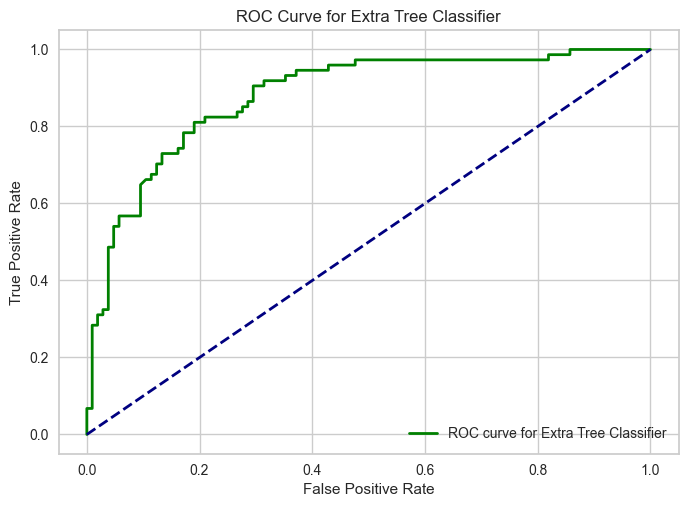

In [48]:
model_ET = ml_models('Extra Tree Classifier', ExtraTreesClassifier(), et_param_grid, X_train, y_train, X_test, y_test)

### 7.8 Multilayer Perceptron (MLP)
The **Multilayer Perceptron (MLP)** is a type of **artificial neural network** that consists of multiple layers of nodes, or neurons, arranged in a **feedforward** manner. It's a versatile **supervised learning** algorithm used for **classification**, **regression**, and **pattern recognition** tasks.

In an MLP, information flows from the input layer through one or more hidden layers to the output layer. Each neuron in a layer is connected to every neuron in the subsequent layer, and each connection is associated with a **weight** that determines the strength of the connection.

During training, the MLP learns to adjust the weights of its connections using **backpropagation** and **gradient descent** optimization. This process involves iteratively updating the weights to minimize the difference between the predicted and actual outputs, known as the **loss function**.

MLP is capable of **learning complex non-linear relationships** in the data, making it suitable for **high-dimensional** and **non-linear** classification tasks. However, MLP's performance depends on factors such as the **architecture** of the network, **activation functions**, and **regularization** techniques.

Despite its effectiveness, MLPs can be **computationally intensive** to train, especially for large datasets or complex architectures. Additionally, they may be prone to **overfitting** if not properly regularized or if the training data is limited.

MLPs are widely used in various fields, including **computer vision**, **natural language processing**, and **speech recognition**, for tasks such as **image classification**, **sentiment analysis**, and **voice recognition**.


In [49]:

mlp_param_grid = {
    'hidden_layer_sizes': [(100,), (50, 50), (100, 50, 100)],
    'activation': ['relu', 'tanh', 'logistic'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01, 0.1]
}

.:. Fitting Multilayer Perceptron .:.
Fitting 10 folds for each of 81 candidates, totalling 810 fits
GridSearchCV(cv=10, estimator=MLPClassifier(max_iter=500), n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh', 'logistic'],
                         'alpha': [0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [(100,), (50, 50),
                                                (100, 50, 100)],
                         'learning_rate_init': [0.001, 0.01, 0.1]},
             verbose=1)

.:. Final Estimators for Multilayer Perceptron .:.
MLPClassifier(activation='logistic', alpha=0.01, max_iter=500)

.:. Accuracy & Best Score for Multilayer Perceptron .:.
	>> Accuracy: 78.21%
	>> Best Score: 78.50%

.:. Classification Report .:.
              precision    recall  f1-score   support

           0       0.76      0.91      0.83       105
           1       0.83      0.59      0.69        74

    accuracy                           0.78       179
   macro avg   

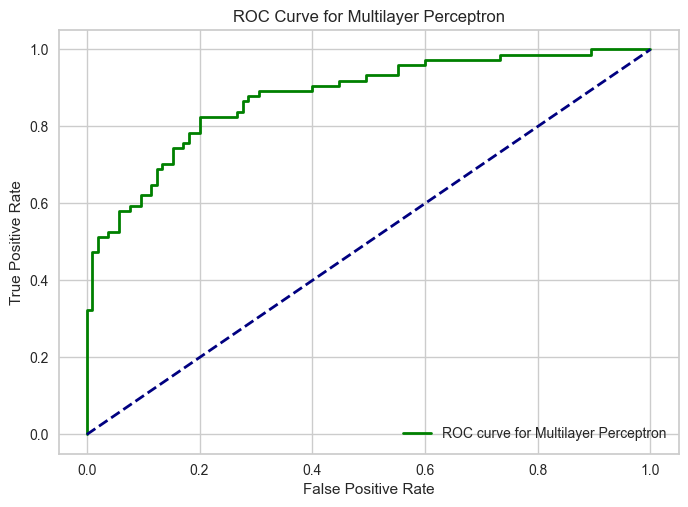

In [50]:
model_MLP = ml_models('Multilayer Perceptron', MLPClassifier(max_iter=500), mlp_param_grid, X_train, y_train, X_test, y_test)

### 7.9 Model Comparison

In [53]:
# Create DataFrame
compare_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machine', 'K-Nearest Neighbour', 'Decision Tree',
              'Random Forest', 'Gradient Boosting', 'Extra Tree Classifier', 'Multilayer Perceptron'],
    'Accuracy Train': [model_LR[2]*100, model_SVC[2]*100, model_KNN[2]*100, model_DT[2]*100, model_RF[2]*100, 
                       model_GB[2]*100, model_ET[2]*100, model_MLP[2]*100],
    'Accuracy Test': [model_LR[1]*100, model_SVC[1]*100, model_KNN[1]*100, model_DT[1]*100, model_RF[1]*100, 
                      model_GB[1]*100, model_ET[1]*100, model_MLP[1]*100],
    'Best Score': [model_LR[3]*100, model_SVC[3]*100, model_KNN[3]*100, model_DT[3]*100, model_RF[3]*100, 
                   model_GB[3]*100, model_ET[3]*100, model_MLP[3]*100]
})

# Display DataFrame
print(".:. Models Comparison .:.")
print('*' * 26)
print(compare_df.sort_values(by='Best Score', ascending=False).reset_index(drop=True))


.:. Models Comparison .:.
**************************
                    Model  Accuracy Train  Accuracy Test  Best Score
0           Random Forest       84.831461      78.212291   81.044601
1       Gradient Boosting       88.904494      79.888268   80.762911
2   Extra Tree Classifier       86.657303      79.888268   80.760955
3           Decision Tree       83.426966      79.888268   78.798905
4  Support Vector Machine       78.792135      78.212291   78.791080
5   Multilayer Perceptron       78.230337      78.212291   78.503521
6     Logistic Regression       77.387640      77.094972   78.368545
7     K-Nearest Neighbour      100.000000      62.011173   64.456182


**Conclusions**

The evaluation of model performance reveals a diverse landscape, with some models demonstrating robust fitting while others exhibit signs of overfitting. **Notably, gradient boosting, random forest, and support vector machines showcase comparable test accuracies**, suggesting competent predictive abilities. However, **the extra tree classifier stands out as the top performer, boasting the highest test accuracy among the evaluated models**. **ROC AUC curves further validate the predictive prowess of the top models, with all achieving AUC values exceeding 0.8, indicative of their ability to accurately distinguish between survivors and non-survivors**. Moreover, **precision metrics remain consistent across the top models, with around 77-78% of predicted survivors being accurate**, while **recall values indicate correct identification of 70-72% of all survivors**.

Upon closer examination of model behavior, **the extra tree classifier emerges as the most promising candidate, showcasing consistent improvement in validation scores with increasing training set sizes, signifying superior generalization capabilities**. Conversely, **gradient boosting displays strong bias, random forest struggles with underfitting, and support vector machines exhibit signs of overfitting**. **Feature importance analysis unveils critical factors influencing survival predictions, including sex, family survival, passenger class, passenger title, and ticket fare**. These findings underscore the socio-demographic dynamics at play during historical disasters like the Titanic tragedy, offering valuable insights into survival outcomes.



## 8. Submission

In [54]:
df_test_f = transform(df_test)
df_test_f = feat_eng(df_test_f)

In [55]:
# Prediction using Tuned Extra Tree Classifier
y_pred_ET = model_ET[0].predict(df_test_f)

# Creating Submission File
submission = pd.DataFrame({'PassengerId': df_test['PassengerId'] , 'Survived': y_pred_ET})
submission.to_csv("gender_submission.csv", index=False)

# Display Submission
print(".:. Submission .:.")
print('*' * 19)
print(submission.head(5).to_string(index=False))

.:. Submission .:.
*******************
 PassengerId  Survived
         892         0
         893         0
         894         0
         895         0
         896         1
